obl 975


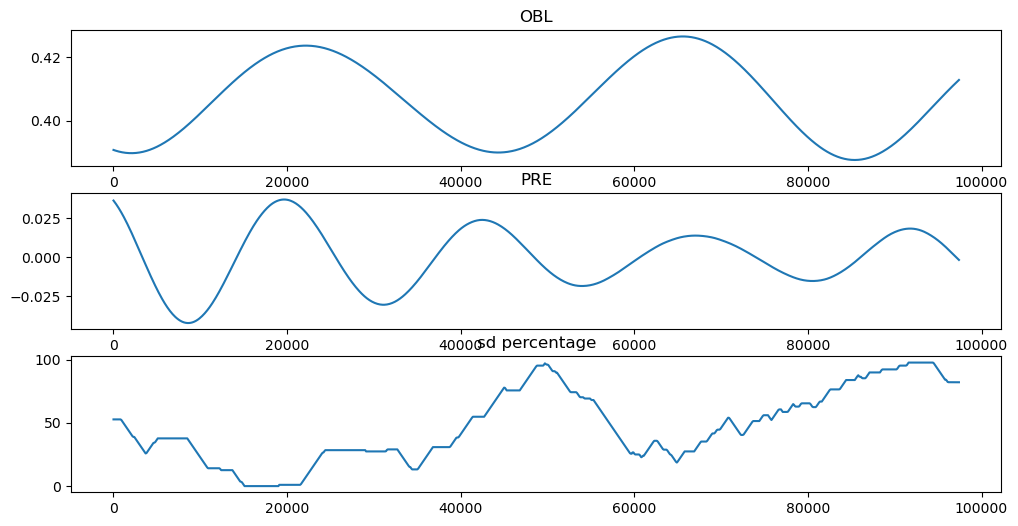

In [1]:
# read csv data
import pandas as pd
df_obl = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_long.csv")
df_pre = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_long.csv")
df_sd = pd.read_csv("output/df_stadial_duration_SlidingWindow.csv")

# plot data using 3 by 1 subplots
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(3, 1, figsize=(12, 6))
ax[0].plot(df_obl["age"], df_obl["obl"], label="obl")
ax[0].set_title("OBL")
ax[1].plot(df_pre["age"], df_pre["pre"], label="pre")
ax[1].set_title("PRE")
ax[2].plot(df_sd["age"], df_sd["percentage"], label="stages")
ax[2].set_title("sd percentage")

# print the length of the data
print("obl", len(df_obl))

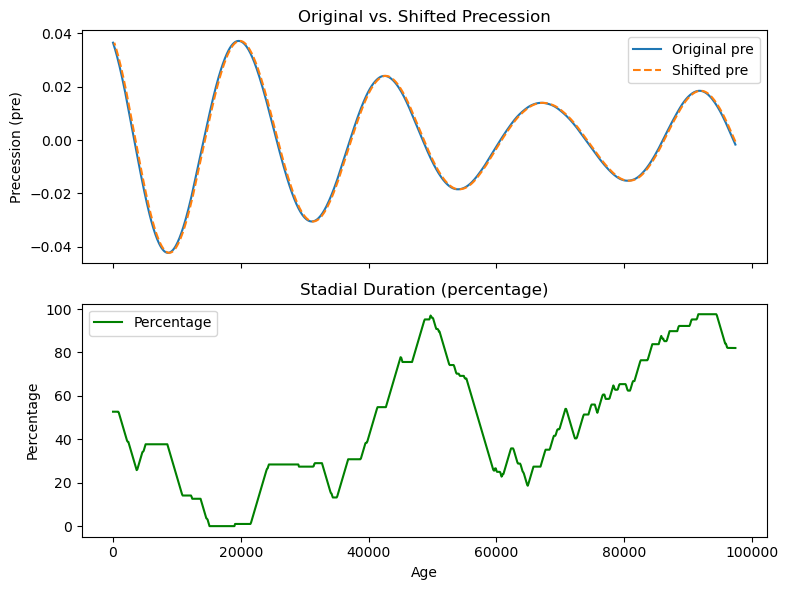

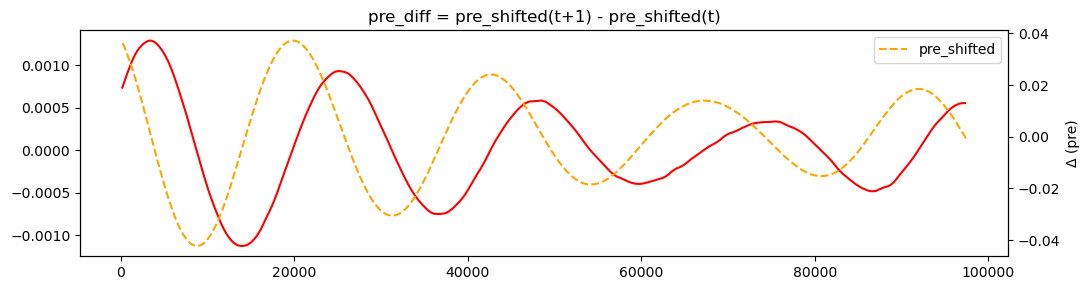

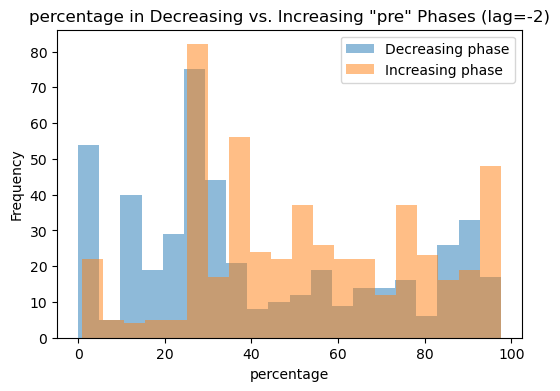

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Choose a lag (how many rows you want to shift 'pre' rightward)
lag = -2

# 2) Shift the pre data by 'lag' steps
#    NOTE: pre_shifted[i] = original pre[i-lag], so the pre data is advanced in time.
df_pre['pre_shifted'] = df_pre['pre'].shift(lag)


fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

# Top subplot: original pre vs. shifted pre
axes[0].plot(df_pre["age"], df_pre["pre"], label="Original pre", linestyle='-')
axes[0].plot(df_pre["age"], df_pre["pre_shifted"], label="Shifted pre", linestyle='--')
axes[0].set_ylabel("Precession (pre)")
axes[0].set_title("Original vs. Shifted Precession")
axes[0].legend()

# Bottom subplot: percentage
axes[1].plot(df_sd["age"], df_sd["percentage"], label="Percentage", color='green')
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Percentage")
axes[1].set_title("Stadial Duration (percentage)")
axes[1].legend()

plt.tight_layout()
plt.show()


# 3) Determine increasing vs. decreasing phases in the shifted pre
#    We'll compare pre_shifted[i+1] - pre_shifted[i]. The last row will be NaN.
df_pre['pre_diff'] = df_pre['pre_shifted'].diff()

plt.figure(figsize=(11, 3))
plt.plot(df_pre["age"], df_pre["pre_diff"], label="pre_diff", color='red')
# plot pre_diff in another axis
plt.twinx()
plt.plot(df_pre["age"], df_pre["pre_shifted"], label="pre_shifted", color='orange', linestyle='--')
plt.xlabel("Age")
plt.ylabel("Δ (pre)")
plt.title("pre_diff = pre_shifted(t+1) - pre_shifted(t)")
plt.legend()
plt.tight_layout()
plt.show()

# Label each row as 'increasing' if pre_diff>0, or 'decreasing' if pre_diff<0
# (You may want to handle pre_diff==0 if it happens.)
df_pre['phase'] = np.where(df_pre['pre_diff'] > 0, 'increasing', 'decreasing')

# 4) Combine the 'phase' information with your 'percentage' data.
#    If both DataFrames are the same length and aligned row-by-row, you can do:
# df_sd['percentage']=np.diff(df_sd['percentage'])
df_sd['phase'] = df_pre['phase']  # copy phase labels into df_sd

#    If df_sd and df_pre do not line up row-for-row, you may need to merge on 'age'
#    or reindex. But for now, let's assume they are aligned and same length.

# 5) Split 'percentage' based on phase
percentage_increasing = df_sd.loc[df_sd['phase'] == 'increasing', 'percentage']
percentage_decreasing = df_sd.loc[df_sd['phase'] == 'decreasing', 'percentage']

# 6) Plot the two histograms together
plt.figure(figsize=(6, 4))

plt.hist(percentage_decreasing, bins=20, alpha=0.5, label='Decreasing phase')
plt.hist(percentage_increasing, bins=20, alpha=0.5, label='Increasing phase')

plt.xlabel('percentage')
plt.ylabel('Frequency')
plt.title(f'percentage in Decreasing vs. Increasing "pre" Phases (lag={lag})')
plt.legend()
plt.show()


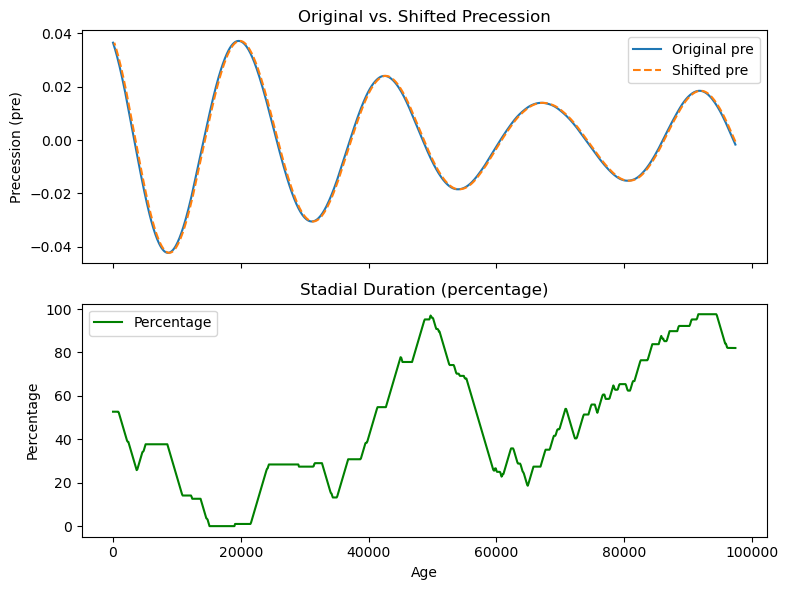

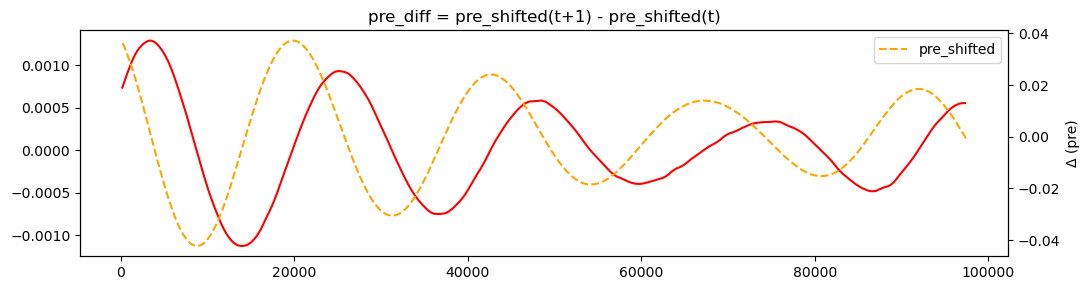

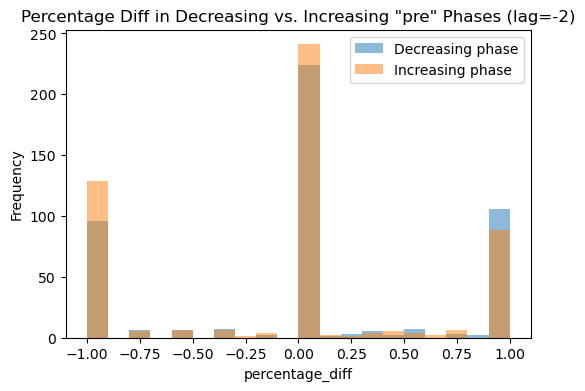

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1) Choose a lag (how many rows you want to shift 'pre' rightward)
lag = -2

# 2) Shift the pre data by 'lag' steps
#    NOTE: pre_shifted[i] = original pre[i-lag], so the pre data is advanced in time.
df_pre['pre_shifted'] = df_pre['pre'].shift(lag)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

# Top subplot: original pre vs. shifted pre
axes[0].plot(df_pre["age"], df_pre["pre"], label="Original pre", linestyle='-')
axes[0].plot(df_pre["age"], df_pre["pre_shifted"], label="Shifted pre", linestyle='--')
axes[0].set_ylabel("Precession (pre)")
axes[0].set_title("Original vs. Shifted Precession")
axes[0].legend()

# Bottom subplot: percentage
axes[1].plot(df_sd["age"], df_sd["percentage"], label="Percentage", color='green')
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Percentage")
axes[1].set_title("Stadial Duration (percentage)")
axes[1].legend()

plt.tight_layout()
plt.show()

# 3) Determine increasing vs. decreasing phases in the shifted pre
#    We'll compare pre_shifted[i+1] - pre_shifted[i].
#    The last row will be NaN.
df_pre['pre_diff'] = df_pre['pre_shifted'].diff()

plt.figure(figsize=(11, 3))
plt.plot(df_pre["age"], df_pre["pre_diff"], label="pre_diff", color='red')
# Plot pre_shifted on the secondary y-axis
ax2 = plt.twinx()
ax2.plot(df_pre["age"], df_pre["pre_shifted"], label="pre_shifted", color='orange', linestyle='--')
plt.xlabel("Age")
plt.ylabel("Δ (pre)")
plt.title("pre_diff = pre_shifted(t+1) - pre_shifted(t)")
plt.legend()
plt.tight_layout()
plt.show()

# Label each row as 'increasing' if pre_diff>0, or 'decreasing' if pre_diff<0
df_pre['phase'] = np.where(df_pre['pre_diff'] > 0, 'increasing', 'decreasing')

# 4) Combine the 'phase' information with your 'percentage' data.
#    Instead of overwriting 'percentage' with np.diff (which changes the length),
#    put it in a new column so we keep alignment with df_pre.
df_sd['percentage_diff'] = df_sd['percentage'].diff()
df_sd['phase'] = df_pre['phase']  # copy phase labels into df_sd

# 5) Split 'percentage_diff' based on phase
#    (the first row in 'percentage_diff' will be NaN, so you may want to dropna)
percentage_increasing = df_sd.loc[df_sd['phase'] == 'increasing', 'percentage_diff'].dropna()
percentage_decreasing = df_sd.loc[df_sd['phase'] == 'decreasing', 'percentage_diff'].dropna()

# 6) Plot the two histograms together
plt.figure(figsize=(6, 4))

plt.hist(percentage_decreasing, bins=20, alpha=0.5, label='Decreasing phase')
plt.hist(percentage_increasing, bins=20, alpha=0.5, label='Increasing phase')

plt.xlabel('percentage_diff')
plt.ylabel('Frequency')
plt.title(f'Percentage Diff in Decreasing vs. Increasing "pre" Phases (lag={lag})')
plt.legend()
plt.show()


In [12]:
df_sd

,age,percentage,phase
0,97400.0,82.04,decreasing
1,97300.0,82.04,decreasing
2,97200.0,82.04,decreasing
3,97100.0,82.04,decreasing
4,97000.0,82.04,decreasing
...,...,...,...
970,400.0,52.70,decreasing
971,300.0,52.70,decreasing
972,200.0,52.70,decreasing
973,100.0,52.70,decreasing


Text(0, 0.5, 'sd percentage')

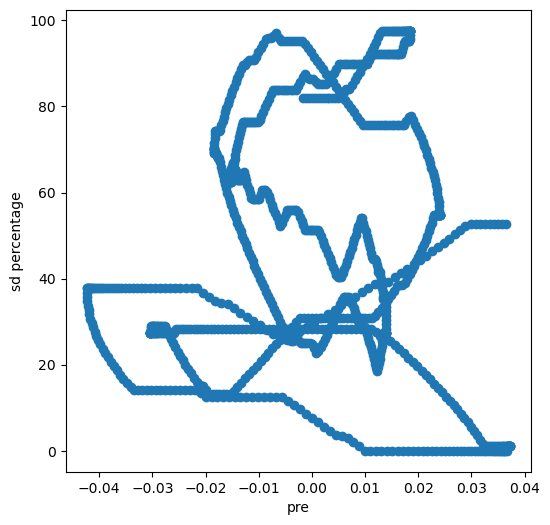

In [2]:
# plot a cross plot between pre and sd
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(df_pre["pre"], df_sd["percentage"])
ax.set_xlabel("pre")
ax.set_ylabel("sd percentage")